In [3]:
#Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [5]:
#reading the data into mdata
mdata = pd.read_csv("Movies.csv")
mdata.head()

,Collection,Marketin_expense,Production_expense,Multiplex_coverage,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,Critic_rating,Trailer_views,Time_taken,Twitter_hastags,Genre,Avg_age_actors,MPAA_film_rating,Num_multiplex,3D_available
0,48000,20.1264,59.62,0.462,36524.125,138.7,7.825,8.095,7.910,7.995,7.94,527367,109.60,223.840,Thriller,23,PG,494,YES
1,43200,20.5462,69.14,0.531,35668.655,152.4,7.505,7.650,7.440,7.470,7.44,494055,146.64,243.456,Drama,42,PG,462,NO
2,69400,20.5458,69.14,0.531,39912.675,134.6,7.485,7.570,7.495,7.515,7.44,547051,147.88,2022.400,Comedy,38,PG,458,NO
3,66800,20.6474,59.36,0.542,38873.890,119.3,6.895,7.035,6.920,7.020,8.26,516279,185.36,225.344,Drama,45,PG,472,YES
4,72400,21.3810,59.36,0.542,39701.585,127.7,6.920,7.070,6.815,7.070,8.26,531448,176.48,225.792,Drama,55,PG,395,NO


In [13]:
mdata.shape

(400, 19)

In [9]:
mdata.describe()

,Collection,Marketin_expense,Production_expense,Multiplex_coverage,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,Critic_rating,Trailer_views,Time_taken,Twitter_hastags,Avg_age_actors,Num_multiplex
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,392.000000,400.000000,400.000000,400.000000
mean,48646.500000,55.017180,73.832700,0.469881,35197.771537,137.581750,7.810275,7.982812,7.813375,7.993887,7.894100,463223.567500,157.790000,258.083840,38.715000,523.650000
std,18308.499136,119.755634,13.023426,0.113920,4075.766926,28.990673,1.088694,1.089923,1.093581,1.088619,0.672413,65225.567649,31.723517,94.621476,12.651043,103.661283
min,10000.000000,20.126400,55.920000,0.129000,19781.355000,76.400000,3.840000,4.035000,3.840000,4.030000,6.600000,215432.000000,0.000000,201.632000,3.000000,333.000000
25%,37800.000000,21.321950,63.250000,0.419000,32721.727500,111.175000,7.092500,7.252500,7.123750,7.273750,7.320000,436793.500000,133.360000,223.804000,26.000000,451.000000
50%,45000.000000,23.214700,69.030000,0.494500,34593.762500,142.250000,7.995000,8.157500,7.990000,8.140000,7.960000,474930.000000,159.720000,246.680000,39.000000,510.000000
75%,56500.000000,34.638300,82.840000,0.558000,37142.118750,165.400000,8.725000,8.912500,8.740000,8.931250,8.400000,507690.500000,183.210000,283.444000,50.000000,571.000000
max,100000.000000,1799.524000,106.300000,0.615000,48772.900000,173.500000,9.435000,9.540000,9.425000,9.635000,9.400000,567784.000000,217.520000,2022.400000,60.000000,868.000000


In [11]:
mdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Collection           400 non-null    int64  
 1   Marketin_expense     400 non-null    float64
 2   Production_expense   400 non-null    float64
 3   Multiplex_coverage   400 non-null    float64
 4   Budget               400 non-null    float64
 5   Movie_length         400 non-null    float64
 6   Lead_ Actor_Rating   400 non-null    float64
 7   Lead_Actress_rating  400 non-null    float64
 8   Director_rating      400 non-null    float64
 9   Producer_rating      400 non-null    float64
 10  Critic_rating        400 non-null    float64
 11  Trailer_views        400 non-null    int64  
 12  Time_taken           392 non-null    float64
 13  Twitter_hastags      400 non-null    float64
 14  Genre                400 non-null    object 
 15  Avg_age_actors       400 non-null    int

In [20]:
#removing Null Values
mdata.dropna(axis = 0, inplace = True)

### After excuting above statement 8 rows are dropped since they had null values

In [23]:
#shape of data is changes after dropping null values
mdata.shape

(392, 19)

In [26]:
mdata.isnull().sum()

Collection             0
Marketin_expense       0
Production_expense     0
Multiplex_coverage     0
Budget                 0
Movie_length           0
Lead_ Actor_Rating     0
Lead_Actress_rating    0
Director_rating        0
Producer_rating        0
Critic_rating          0
Trailer_views          0
Time_taken             0
Twitter_hastags        0
Genre                  0
Avg_age_actors         0
MPAA_film_rating       0
Num_multiplex          0
3D_available           0
dtype: int64

In [30]:
#creating objects into integers using Label Encoder
le = preprocessing.LabelEncoder()
mdata["Genre"] = le.fit_transform(mdata["Genre"])
mdata["MPAA_film_rating"] = le.fit_transform(mdata["MPAA_film_rating"])
mdata["3D_available"] = le.fit_transform(mdata["3D_available"])

In [31]:
mdata.head()

,Collection,Marketin_expense,Production_expense,Multiplex_coverage,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,Critic_rating,Trailer_views,Time_taken,Twitter_hastags,Genre,Avg_age_actors,MPAA_film_rating,Num_multiplex,3D_available
0,48000,20.1264,59.62,0.462,36524.125,138.7,7.825,8.095,7.910,7.995,7.94,527367,109.60,223.840,3,23,0,494,1
1,43200,20.5462,69.14,0.531,35668.655,152.4,7.505,7.650,7.440,7.470,7.44,494055,146.64,243.456,2,42,0,462,0
2,69400,20.5458,69.14,0.531,39912.675,134.6,7.485,7.570,7.495,7.515,7.44,547051,147.88,2022.400,1,38,0,458,0
3,66800,20.6474,59.36,0.542,38873.890,119.3,6.895,7.035,6.920,7.020,8.26,516279,185.36,225.344,2,45,0,472,1
4,72400,21.3810,59.36,0.542,39701.585,127.7,6.920,7.070,6.815,7.070,8.26,531448,176.48,225.792,2,55,0,395,0


In [33]:
mdata.isnull().sum()

Collection             0
Marketin_expense       0
Production_expense     0
Multiplex_coverage     0
Budget                 0
Movie_length           0
Lead_ Actor_Rating     0
Lead_Actress_rating    0
Director_rating        0
Producer_rating        0
Critic_rating          0
Trailer_views          0
Time_taken             0
Twitter_hastags        0
Genre                  0
Avg_age_actors         0
MPAA_film_rating       0
Num_multiplex          0
3D_available           0
dtype: int64

### Cleaning the data

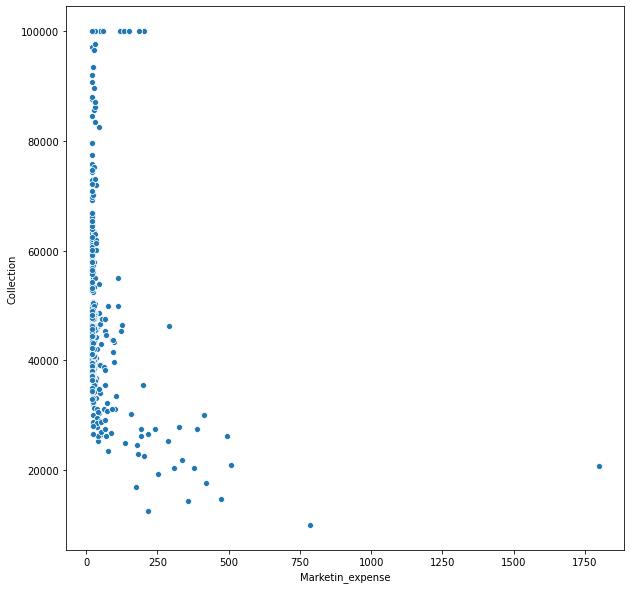

In [35]:
#plotting each x varaible against y varaible
plt.figure(figsize=(10,10))
sns.scatterplot(x = mdata["Marketin_expense"], y = mdata["Collection"])
plt.show()

### There is a outlayer found

In [46]:
#deleting the outlayer
i = mdata.loc[mdata["Marketin_expense"]>700].index
print(i)
mdata.drop(i, inplace = True)

Int64Index([398], dtype='int64')


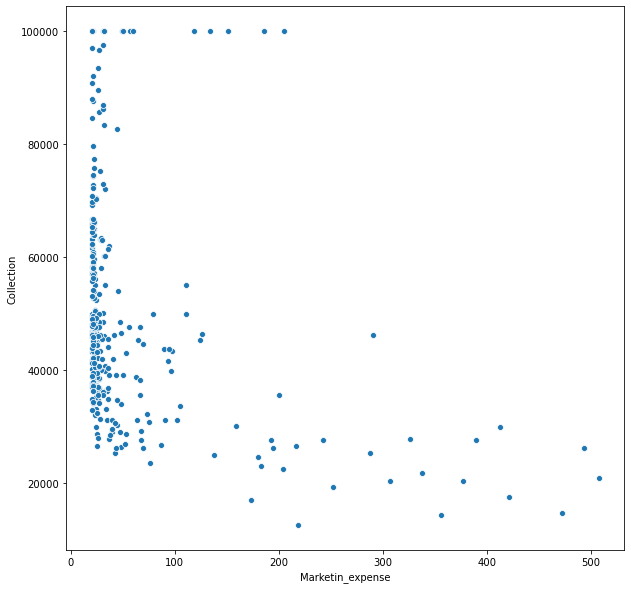

In [48]:
#plotting anain after outlayer
plt.figure(figsize=(10,10))
sns.scatterplot(x = mdata["Marketin_expense"], y = mdata["Collection"])
plt.show()

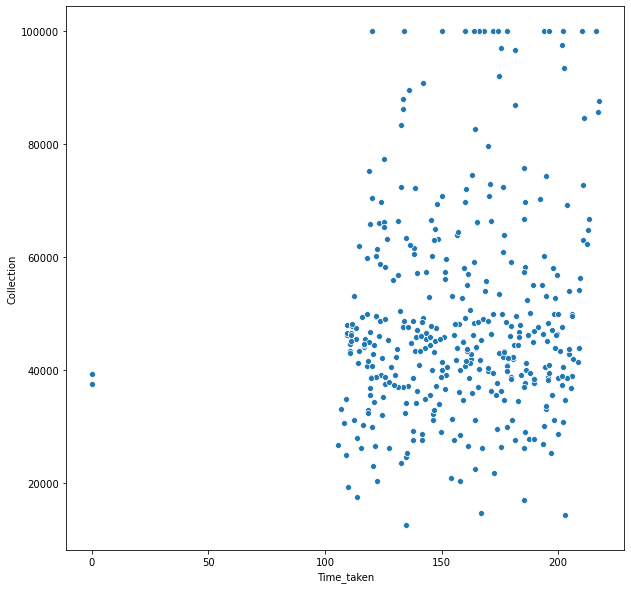

In [52]:
#plotting one more x variable againsy y varaible
plt.figure(figsize = (10,10))
sns.scatterplot(x = mdata["Time_taken"], y = mdata["Collection"])
plt.show()

### removing one more outlayer

In [54]:
i = mdata.loc[mdata["Time_taken"]<50].index
print(i)
mdata.drop(i, inplace = True)

Int64Index([50, 112], dtype='int64')


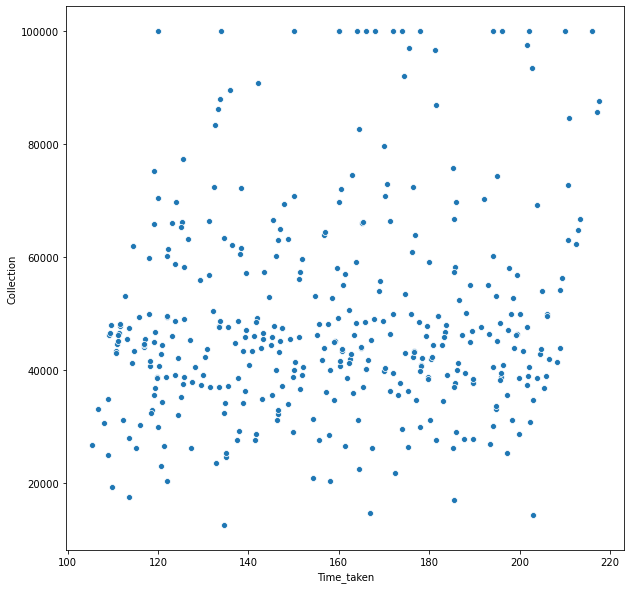

In [56]:
# plotting again after deleting outlayers
plt.figure(figsize = (10,10))
sns.scatterplot(x = mdata["Time_taken"], y = mdata["Collection"])
plt.show()

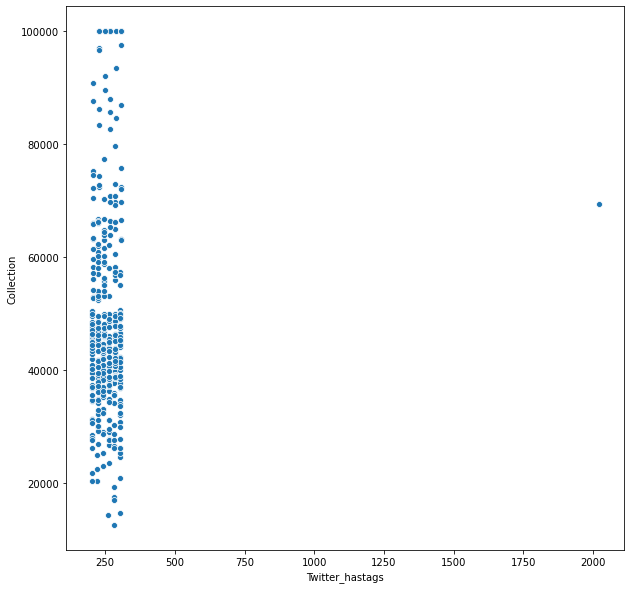

In [58]:
#plotting against different variables 
plt.figure(figsize=(10,10))
sns.scatterplot(x = mdata["Twitter_hastags"], y = mdata["Collection"])
plt.show()

### One more outlayer found, dropping it

In [60]:
i = mdata.loc[mdata["Twitter_hastags"]>750].index
print(i)
mdata.drop(i, inplace = True)

Int64Index([2], dtype='int64')


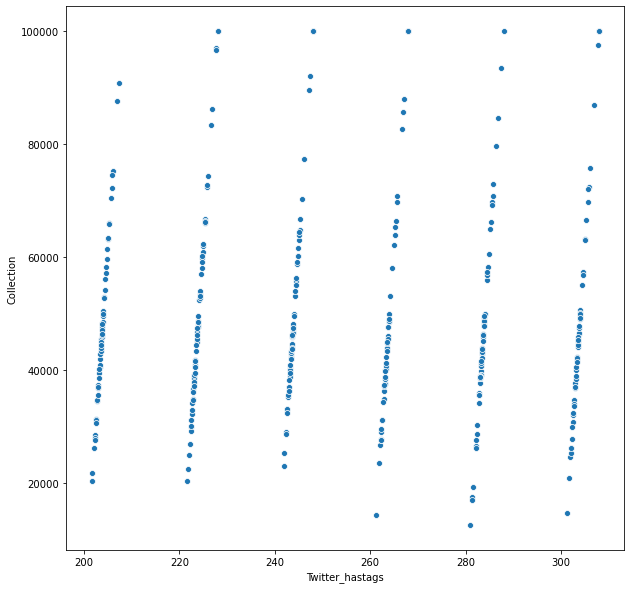

In [62]:
plt.figure(figsize=(10,10))
sns.scatterplot(x = mdata["Twitter_hastags"], y = mdata["Collection"])
plt.show()

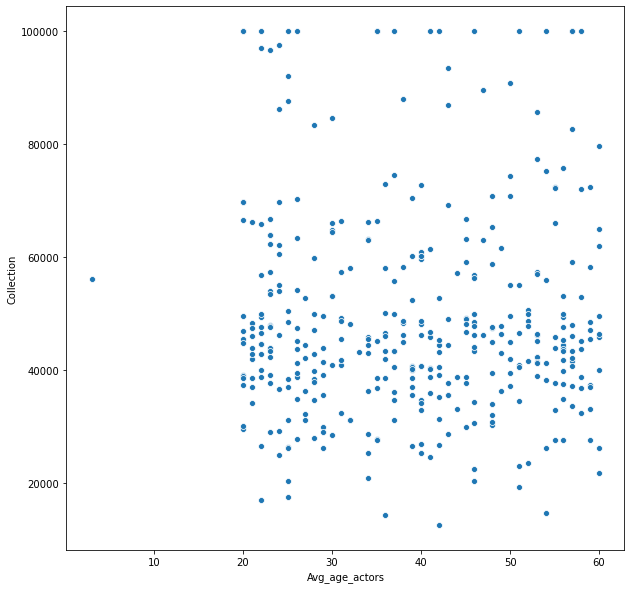

In [63]:
#plotting again to findout another outlayer
plt.figure(figsize=(10,10))
sns.scatterplot(x = mdata["Avg_age_actors"], y = mdata["Collection"])
plt.show()

### Removing outlayer under Avg_age_actors

In [65]:
i = mdata.loc[mdata["Avg_age_actors"]<10].index
print(i)
mdata.drop(i, inplace = True)

Int64Index([], dtype='int64')


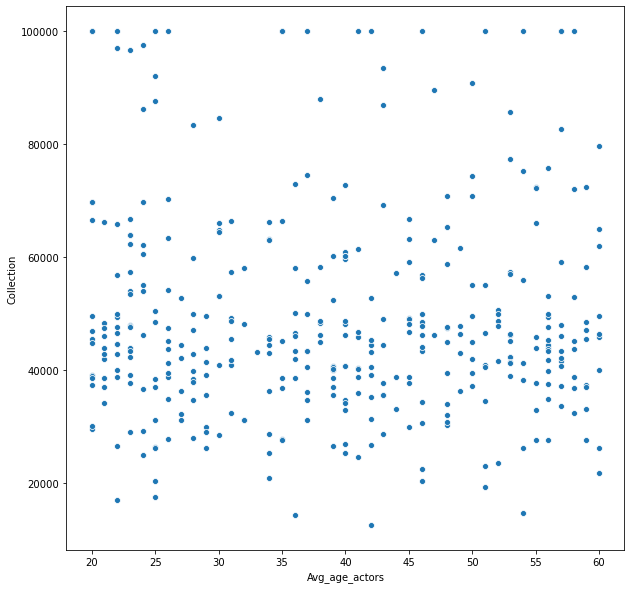

In [67]:
#plotting after excluding outlayer
plt.figure(figsize=(10,10))
sns.scatterplot(x = mdata["Avg_age_actors"], y = mdata["Collection"])
plt.show()

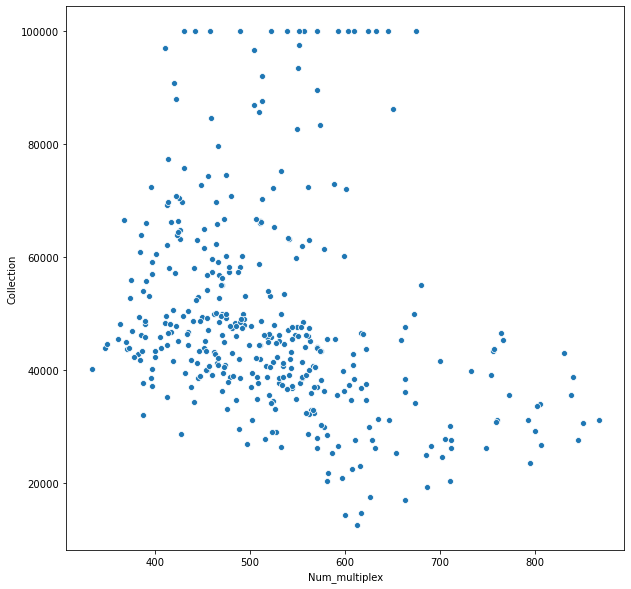

In [69]:
plt.figure(figsize = (10,10))
sns.scatterplot(x = mdata["Num_multiplex"], y = mdata["Collection"])
plt.show()

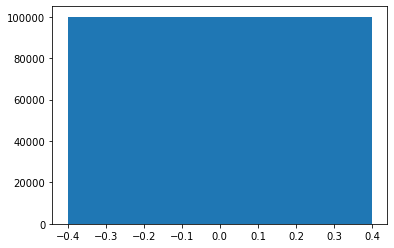

In [73]:
plt.bar(mdata["MPAA_film_rating"], mdata["Collection"])
plt.show()

### Above MPAA Film Rating will not give any output out of analysis, so excluding it

In [80]:
i = mdata.drop(["MPAA_film_rating"], axis = 1, inplace = True)
print(i)

None


In [84]:
mdata.head()

,Collection,Marketin_expense,Production_expense,Multiplex_coverage,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,Critic_rating,Trailer_views,Time_taken,Twitter_hastags,Genre,Avg_age_actors,Num_multiplex,3D_available
0,48000,20.1264,59.62,0.462,36524.125,138.7,7.825,8.095,7.910,7.995,7.94,527367,109.60,223.840,3,23,494,1
1,43200,20.5462,69.14,0.531,35668.655,152.4,7.505,7.650,7.440,7.470,7.44,494055,146.64,243.456,2,42,462,0
3,66800,20.6474,59.36,0.542,38873.890,119.3,6.895,7.035,6.920,7.020,8.26,516279,185.36,225.344,2,45,472,1
4,72400,21.3810,59.36,0.542,39701.585,127.7,6.920,7.070,6.815,7.070,8.26,531448,176.48,225.792,2,55,395,0
5,57400,20.5970,59.36,0.542,35718.650,132.2,6.890,7.100,6.885,7.005,7.26,498425,143.48,284.592,1,53,460,1


In [82]:
mdata.shape

(386, 18)

In [85]:
x = mdata.drop(["Collection"], axis = 1, inplace = False)
y = mdata["Collection"]

In [87]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.25, random_state = 10)
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(289, 17) (97, 17) (289,) (97,)


In [89]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression()

In [90]:
y_pred = regressor.predict(x_test)
df_predict = pd.DataFrame({"Actual":y_test, "Predicted":y_pred})
df_predict

,Actual,Predicted
251,49600,54792.083625
314,47600,55900.534192
277,66200,53862.709573
71,43400,47418.974404
346,34400,32383.432200
...,...,...
259,60200,62297.279804
31,29000,39416.454255
218,43000,41003.873566
109,38800,47391.449459


In [1]:
r2_score(y_test,y_pred)

NameError: name 'r2_score' is not defined